In [4]:
# --- Core Part 1: s(n) Function  ---

def s(n):
    
# Return the sum of proper divisors of n.
    if n <= 1:
        return 0
        
    total_sum = 0
    # Loop through EVERY number from 1 up to (but not including) n
    for d in range(1, n):
        if n % d == 0:
            # If d divides n, it's a proper divisor
            total_sum = total_sum + d
            
    return total_sum # Return the final sum

In [11]:
# --- Core Part 2 Generate Sequence  ---

def compute_aliquot_sequence(n_start, k_max, i_max):
    '''
    n_start = starting position
    k_max = max number of steps sequence allowed to have
    i_max = max value the sequence allowed to have

    '''

    sequence = [n_start]
    seen = {n_start} # Use a set for fast loop detection
    n = n_start
    status = "Exceeds_k"  # Default status if nothing else happens
    
    for i in range(k_max - 1): # k_max total terms, so k_max-1 new terms
        
        n_next = s(n) 
        sequence.append(n_next) # Add the new term to our sequence
        
        # Check for termination, when it hits zero
        if n_next == 0:
            status = "Terminates"
            break # stop the loop
        
        # Check for i_max limit    
        if n_next > i_max:
            status = "Exceeds_i"
            break 
        
        # --- Core Part 3 The Loop ---
        # Look at the new term and check our 'seen' list (our memory)
        if n_next in seen: 
            status = "Loops"
            break
            
        seen.add(n_next)
        n = n_next
        
    else:
        # Loop finished without breaking
        status = "Exceeds_k"

    return (sequence, status)

**Re-do for faster version**

In [3]:


# --- Core Part 1: s(n) Function ---
# Using the  square-root version --> faster
def s(n):
    """
    Return the sum of proper divisors of n.
    """
    if n <= 1:
        return 0

    divisors = {1}
    
    for d in range(2, int(n**0.5) + 1):
        if n % d == 0:
            divisors.add(d)
            pair = n // d
            if d != pair:
                divisors.add(pair)

    return sum(divisors)

# --- Core Part 2 & 3: Compute Sequence & Detect Loops ---
def compute_aliquot_sequence(n_start, k_max, i_max):
    """
    Computes the aliquot sequence and detects loops.
    """
    
    sequence = [n_start]
    seen = [n_start] # Use a list to keep track of seen numbers
    n = n_start
    status = "Exceeds_k"  # Default status
    
    for _ in range(k_max - 1):
        
        n_next = s(n) 
        sequence.append(n_next)
        
        # Core 2: Stopping Conditions
        if n_next == 0:
            status = "Terminates"; break
        if n_next > i_max:
            status = "Exceeds_i"; break
        
        # Core 3: Loop Detector
        if n_next in seen: 
            status = "Loops"; break
            
        seen.append(n_next)
        n = n_next
        
    return (sequence, status)
    
import time  # this for Core Part 5

# --- Core Part 4: Classification Function ---
def classify_sequences(n_max, k_max, i_max):
    """
    Classifies all sequences from n=1 to n_max.
    """
    print(f"--- Running Core Part 4: Classification ---")
    print(f"Parameters: n < {n_max+1}, k_max = {k_max}, i_max = {i_max:1.0e}")
    
    # This is the "Start Stopwatch" line for Core 5
    start_time = time.time()
    
    status_counts = {
        "Terminates": 0, "Loops": 0, "Exceeds_k": 0, "Exceeds_i": 0
    }
    
    for n in range(1, n_max + 1):
        if n % 1000 == 0:
            elapsed = time.time() - start_time
            print(f"  ...processing n = {n} (Time: {elapsed:.1f}s)")
            
        _sequence, status = compute_aliquot_sequence(n, k_max, i_max)
        
        if status in status_counts:
            status_counts[status] += 1
        
    # This is the "Stop Stopwatch" line for Core 5
    end_time = time.time()
    total_time = end_time - start_time
    
    print("\n--- Classification Results (End of Core 4) ---")
    print(f"  Terminates: {status_counts['Terminates']}")
    print(f"  Loops:      {status_counts['Loops']}")
    print(f"  Exceeds_k:  {status_counts['Exceeds_k']}")
    print(f"  Exceeds_i:  {status_counts['Exceeds_i']}")
    
    print(f"\nTotal classification time: {total_time:.2f} seconds.")
    
    # We return the total_time so Core 5 can analyze it
    return total_time

# --- Main execution ---
if __name__ == "__main__":
    
    print("--- Core Part 1, 2, 3: Example Sequences ---")
    seq, stat = compute_aliquot_sequence(220, k_max=10, i_max=1e9)
    print(f"n=220 (Loop): {seq}")
    seq, stat = compute_aliquot_sequence(7, k_max=10, i_max=1e9)
    print(f"n=7 (Terminates): {seq}")
    print("\n" + "="*40 + "\n")

    # --- Run Core Part 4 ---
    n_max_core = 20000
    k_core = 30
    i_core = 10**9
    
    time_taken = classify_sequences(n_max_core, k_core, i_core)
    
    print("\n" + "="*40 + "\n")

    # --- Core Part 5: Analysis ---
    # This *is* Core Part 5. It's the analysis of the time_taken.
    
    print(f"--- Core Part 5: Investigation & Analysis ---")
    print(f"The classification for n < 20000 took {time_taken:.2f} seconds.")
    
    # The booklet suggests a "reasonable time" is about 30 seconds [cite: 317]
    if time_taken > 30:
        print("This runtime is longer than the 'reasonable' 30-second goal.")
        print("To improve this, we would need to optimize the code further.")
        print("This is what Extension 9 (Caching) is for.")
    else:
        print("This runtime is within the 'reasonable' 30-second goal!")
        print("To improve the *classification*, we could now try running")
        print("with a higher n_max (like 100,000) or a higher k_max (like 100).")

--- Core Part 1, 2, 3: Example Sequences ---
n=220 (Loop): [220, 284, 220]
n=7 (Terminates): [7, 1, 0]


--- Running Core Part 4: Classification ---
Parameters: n < 20001, k_max = 30, i_max = 1e+09
  ...processing n = 1000 (Time: 0.1s)
  ...processing n = 2000 (Time: 0.4s)
  ...processing n = 3000 (Time: 0.8s)
  ...processing n = 4000 (Time: 1.3s)
  ...processing n = 5000 (Time: 2.0s)
  ...processing n = 6000 (Time: 2.6s)
  ...processing n = 7000 (Time: 3.4s)
  ...processing n = 8000 (Time: 4.0s)
  ...processing n = 9000 (Time: 4.8s)
  ...processing n = 10000 (Time: 5.6s)
  ...processing n = 11000 (Time: 6.4s)
  ...processing n = 12000 (Time: 7.1s)
  ...processing n = 13000 (Time: 7.9s)
  ...processing n = 14000 (Time: 8.9s)
  ...processing n = 15000 (Time: 9.9s)
  ...processing n = 16000 (Time: 10.8s)
  ...processing n = 17000 (Time: 12.5s)
  ...processing n = 18000 (Time: 14.2s)
  ...processing n = 19000 (Time: 15.8s)
  ...processing n = 20000 (Time: 17.2s)

--- Classification Result

**Extension 7**

For extension, we chose to visualize the sequence. Instead of looking at the raw numbers for the sequence, we can visualize them which enter loops. There are different behavior we can see when we compute this. 

1) Termination: Sequences that rapidly decrease to 0.

2) Loops: Sequences that oscillate between values (e.g amicable numbers) or stay constant (perfect numbers).

3) High Growth: Sequences that grow to very large values before potentially stabilizing.
Graphing the sequences allows us to intuitively understand the difference between:


Matplotlib is building the font cache; this may take a moment.


Plotting sequence for n=220 (Status: Loops)


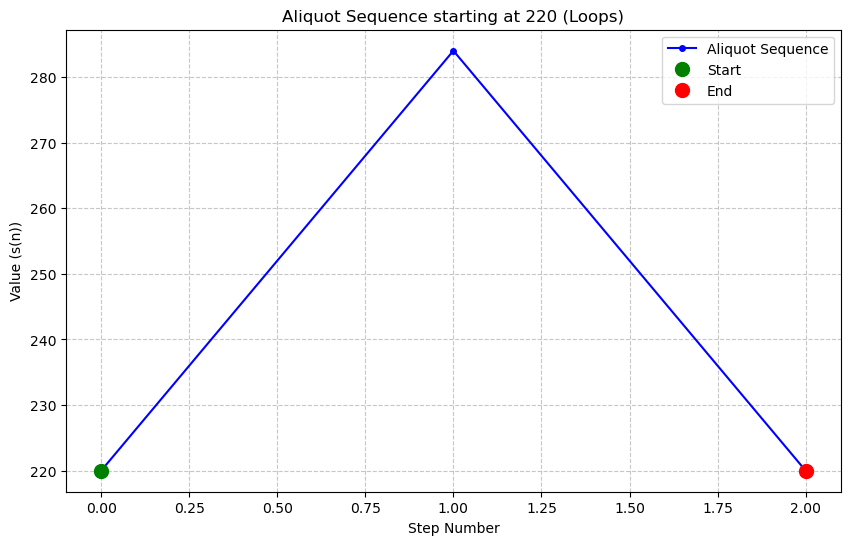

Plotting sequence for n=12 (Status: Terminates)


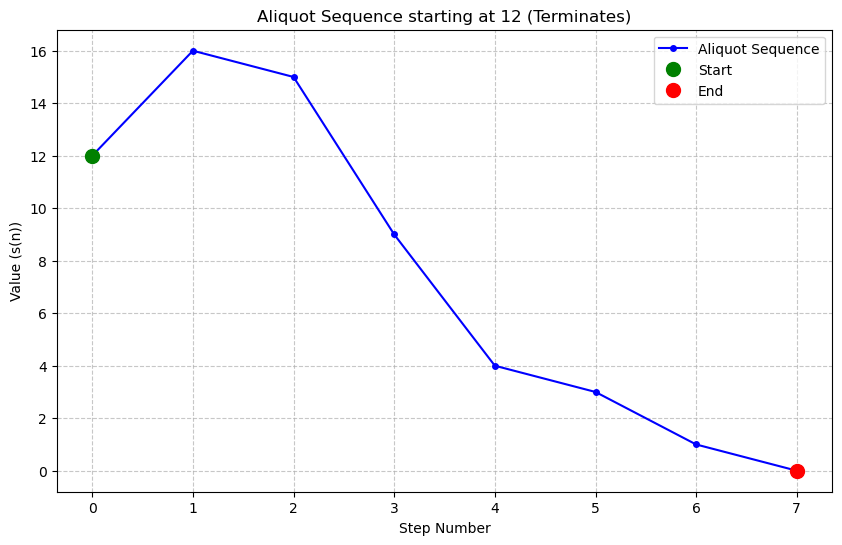

Plotting sequence for n=562 (Status: Loops)


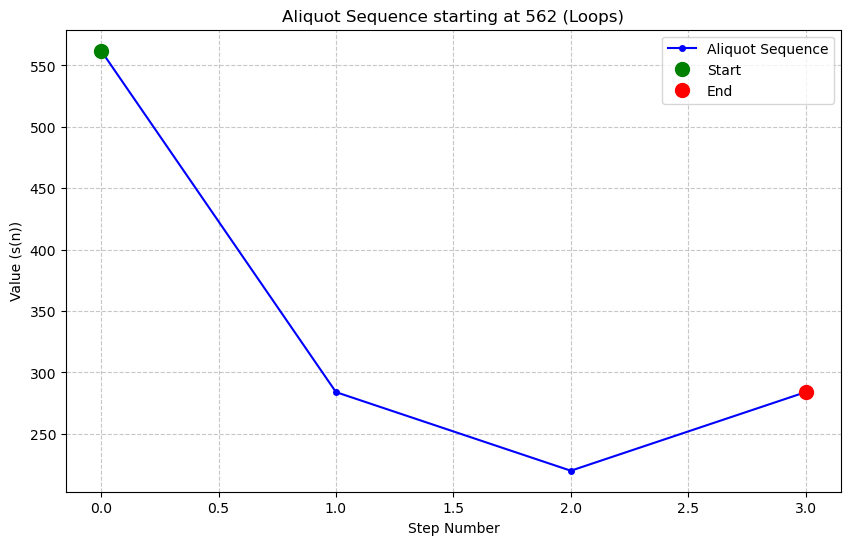

In [2]:
import matplotlib.pyplot as plt  # calling the plotting tool

# --- EXTENSION 7: Plot ---
def plot_aliquot_sequence(n_start, k_max, i_max):
    """
    Calculates and plots the aliquot sequence.
    """
    # Get the data using existing function
    sequence, status = compute_aliquot_sequence(n_start, k_max, i_max)
    
    print(f"Plotting sequence for n={n_start} (Status: {status})")
    
    # Size
    plt.figure(figsize=(10, 6)) # Make the graph 10x6 inches
    
    # Plot: x-axis is the step number, y-axis is the value
    # 'o-' means draw dots ('o') connected by lines ('-')
    plt.plot(sequence, 'o-', color='blue', markersize=4, label='Aliquot Sequence')
    
    # Display
    plt.title(f"Aliquot Sequence starting at {n_start} ({status})")
    plt.xlabel("Step Number")
    plt.ylabel("Value (s(n))")
    plt.grid(True, linestyle='--', alpha=0.7) # Add a grid
    
    # Highlight the start and end
    plt.plot(0, sequence[0], 'go', markersize=10, label='Start') # Green dot for start
    plt.plot(len(sequence)-1, sequence[-1], 'ro', markersize=10, label='End')   # Red dot for end

    # IMPORTANT: Log Scale
    # Some sequences get HUGE (like 562). A "log scale" makes them fit on screen.
    # We only use it if the numbers are very large.
    if max(sequence) > 10000:
        plt.yscale('log')
        plt.ylabel("Value (Log Scale)")
        
    plt.legend() # Show the label key
    plt.show()   # Display the window

# --- Execute ---
if __name__ == "__main__":
    
    # --- Run Extension 7 Examples ---
    # Example 1: A simple loop (Amicable Numbers)
    plot_aliquot_sequence(220, k_max=20, i_max=1e9)
    
    # Example 2: A sequence that terminates
    plot_aliquot_sequence(12, k_max=20, i_max=1e9)
    
    # Example 3: The famous 562 sequence (It goes high)
    # We need a larger k_max to see the whole thing
    plot_aliquot_sequence(562, k_max=100, i_max=1e9)